In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import timeit
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from an invariant distribution of SPDE  
Ref. Goodman & Weare, Ensemble Samplers With Affine Invariance  
A problem with this example is that it's harder to visualize, but from the experiments it does seem that pCN has more consistent performance in high dimensions (judging from acceptance probability).

In [2]:
def plot_traj(x):
    n, dim = x.shape
    for i in range(n):
        t = np.linspace(start=0.0, stop=1.0, num=dim)
        plt.plot(t, x[i, :])

In [3]:
dim = 50
nwalkers = 100
niters = 1000
t_dist = SPDE(N=dim)

#### Not using ensemble, use isotropic gaussian proposal with scale=0.2

In [5]:
dim = 50
proposal = PCNWalkMove(s=None, scale=0.2)

sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 0.95 seconds
avg accept rate: 4.97%


#### Use ensemble of size 3, scale=0.2.  
Experimented with dim=50 & 100, see a decrease in acceptance rate with same scaling parameter.

In [6]:
dim = 50
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 1.14 seconds
avg accept rate: 44.04%


In [7]:
dim = 100
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 1.18 seconds
avg accept rate: 23.61%


#### Ensemble with pCN, beta=0.2  
Experimented with dim=50 & 100, consistency in acceptance rate with same scaling parameter.

In [9]:
dim = 50
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 1.11 seconds
avg accept rate: 74.84%


In [10]:
dim = 100
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 1.34 seconds
avg accept rate: 71.30%


#### PCN without ensemble, beta=0.2  
Need small beta to get good acceptance rate.

In [14]:
dim = 50
proposal = PCNWalkMove(s=None, beta=0.01)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 0.98 seconds
avg accept rate: 56.90%


In [17]:
dim = 100
proposal = PCNWalkMove(s=None, beta=0.01)
start = timeit.default_timer()
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, batch_size=20, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')

finishes in about 1.19 seconds
avg accept rate: 53.79%


In [18]:
x = hist.get_flat("chain")[np.random.choice(100000, 1)]

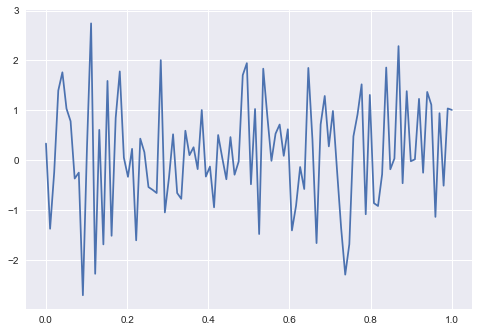

In [19]:
plot_traj(x)